## Student Performance Exploratory data analysis

- how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('StudentsPerformance.csv')

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Size of the DataFrame

In [20]:
df.shape

(1000, 8)

### Missing Values Count per Column

In [21]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Unique Value Count per Column

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
print("gender : ",end=" ")
print(df['gender'].unique())

print("race_ethnicity : ",end=" ")
print(df['race/ethnicity'].unique())

print("inparental_level_of_education : ",end=" ")
print(df['parental level of education'].unique())

print("lunch : ",end=" ")
print(df['lunch'].unique())

print("test_preparation_course: ",end=" ")
print(df['test preparation course'].unique())

gender :  ['female' 'male']
race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
inparental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch :  ['standard' 'free/reduced']
test_preparation_course:  ['none' 'completed']


In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### numerical & categorical column

In [27]:
# Identify numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Display the results
print(f"Total numerical columns ({len(num_cols)}): {num_cols}")
print(f"\nTotal categorical columns ({len(cat_cols)}): {cat_cols}")


Total numerical columns (3): ['math score', 'reading score', 'writing score']

Total categorical columns (5): ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Feature Engineering

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Feature Engineering: Total and Average Scores

In [29]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['Total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
# Save your updated DataFrame to CSV
df.to_csv('updated_student_scores.csv', index=False)


### Visualizing Average Score Distribution by Gender

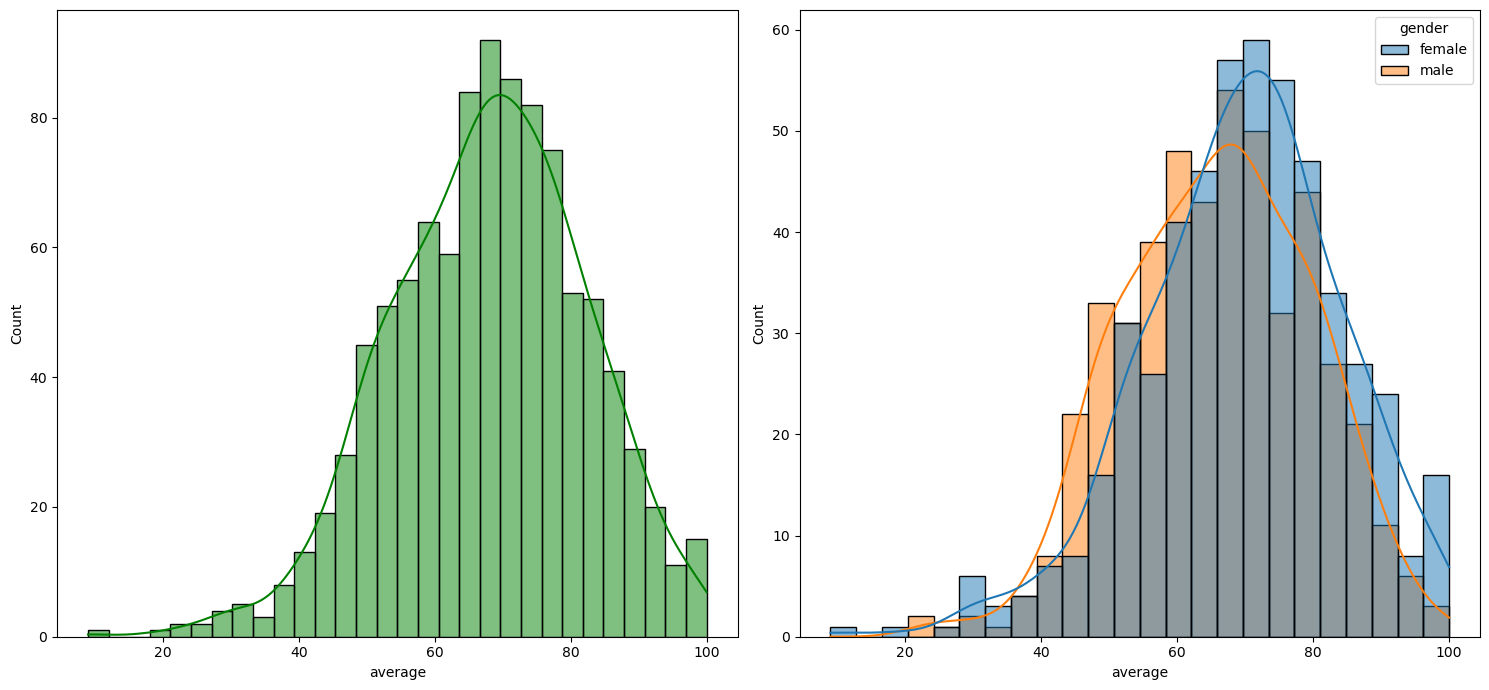

In [32]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of average scores
sns.histplot(data=df, x='average', bins=30, kde=True, color='green', ax=axes[0])

# Plot 2: Histogram of average scores separated by gender
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axes[1])

# Display the plots
plt.tight_layout()
plt.show()


### Visualizing Total Score Distribution by Gender


- Performance of female students is higher compared to male students

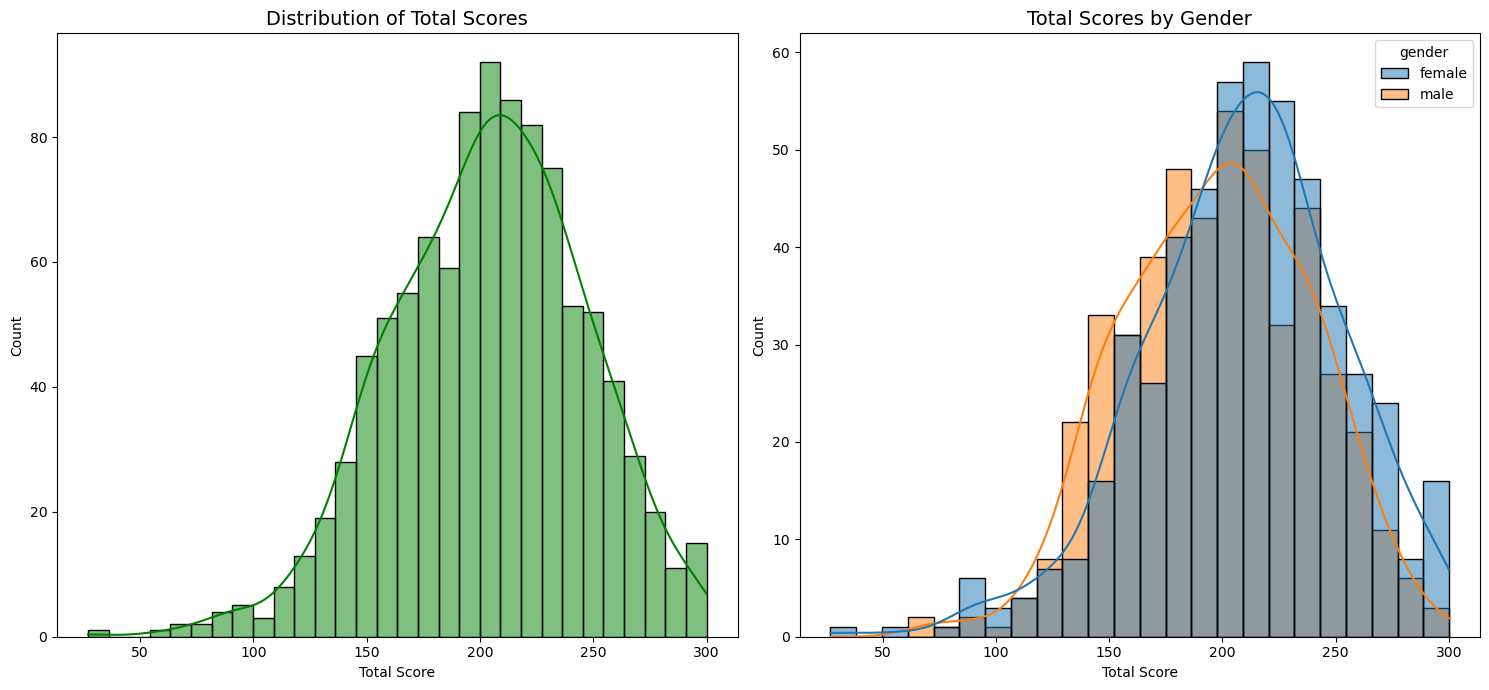

In [33]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Total score distribution
sns.histplot(data=df, x='Total_score', bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Total Scores', fontsize=14)
axes[0].set_xlabel('Total Score')
axes[0].set_ylabel('Count')

# Second subplot: Total score distribution by gender
sns.histplot(data=df, x='Total_score', kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Total Scores by Gender', fontsize=14)
axes[1].set_xlabel('Total Score')
axes[1].set_ylabel('Count')

# Adjust layout and display
plt.tight_layout()
plt.show()


### Analyzing the Impact of Lunch Type on Student Performance by Gender

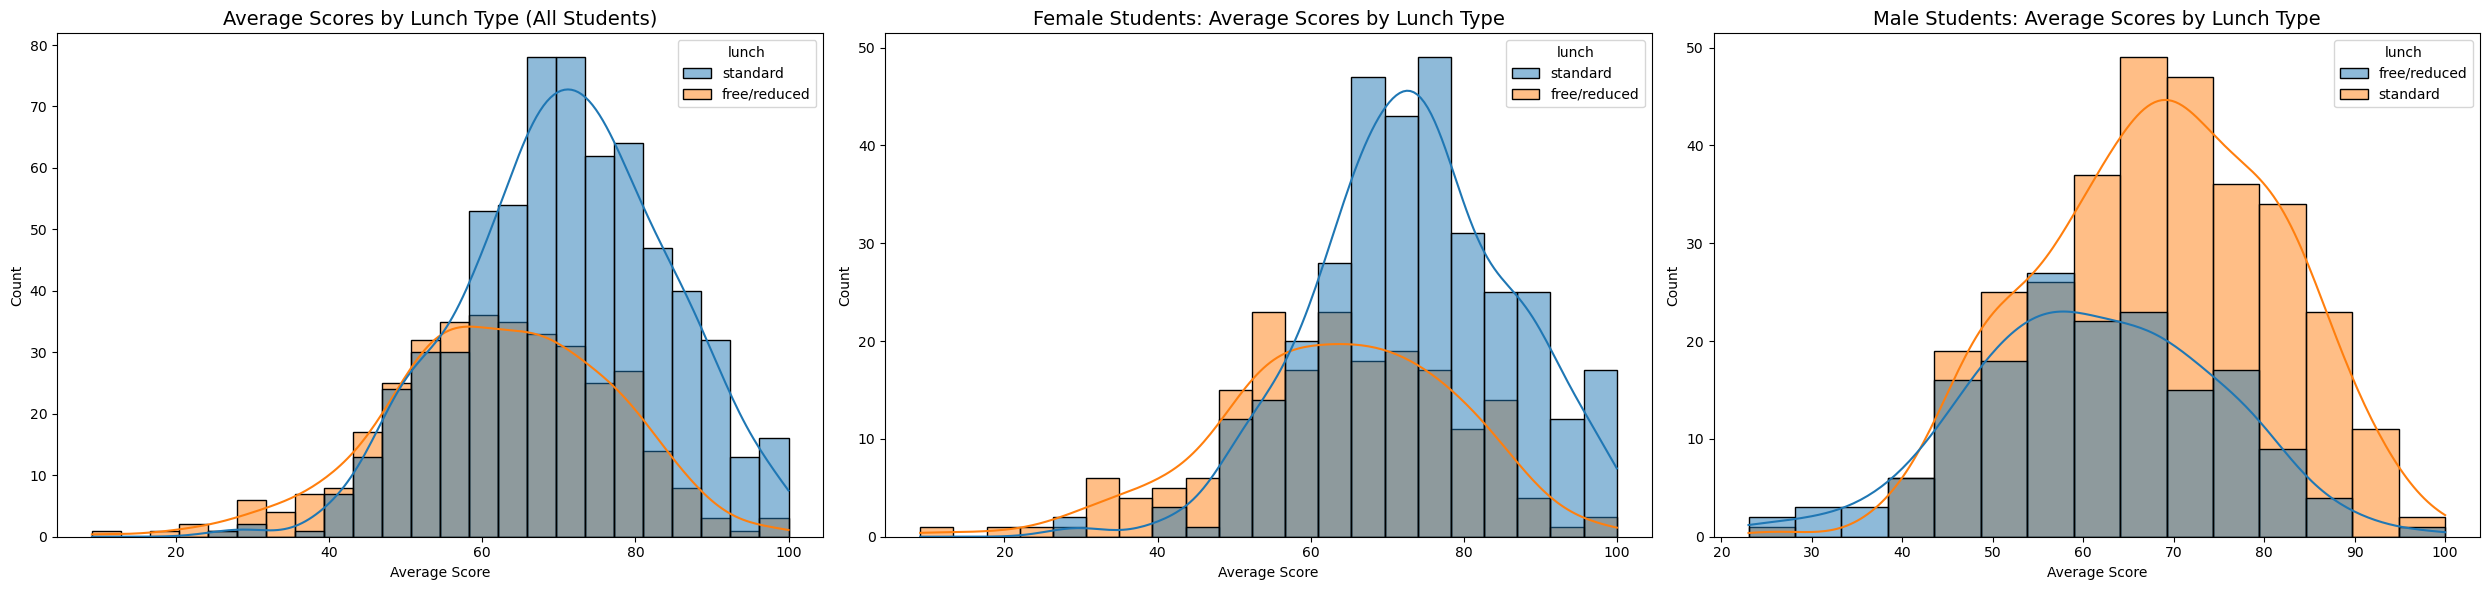

In [34]:
# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Overall average scores by lunch type
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('Average Scores by Lunch Type (All Students)', fontsize=14)
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Count')

# Female students average scores by lunch type
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female Students: Average Scores by Lunch Type', fontsize=14)
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Count')

# Male students average scores by lunch type
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male Students: Average Scores by Lunch Type', fontsize=14)
axes[2].set_xlabel('Average Score')
axes[2].set_ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()


1. Overall Lunch Type Comparison
Students who receive standard lunch consistently perform better on average compared to those with free/reduced lunch.

The distribution for standard lunch is centered around 70–80, while free/reduced clusters more around 50–60.

👩 2. Female Students
Female students with standard lunch show a strong peak around 75–85, indicating higher performance.

Those on free/reduced lunch have a broader spread with lower scores, typically 45–65.

There is a noticeable performance gap between lunch types among females.

👨 3. Male Students
The trend is reversed in the legend, but from the graph:

Free/reduced lunch (orange) has higher counts in higher score ranges (60–90).

Standard lunch group has more spread and lower peaks, suggesting less impact or an outlier pattern.

This may suggest that lunch type has less influence on male students' performance or the groups are unevenly distributed.

🧠 Overall Insight
Lunch type is a significant factor, especially for female students, where better nutrition (standard lunch) correlates with higher academic performance.

For male students, the effect of lunch type is less consistent and may require deeper analysis (e.g., sample size check).

### Impact of Parental Education Level on Student Performance by Gender

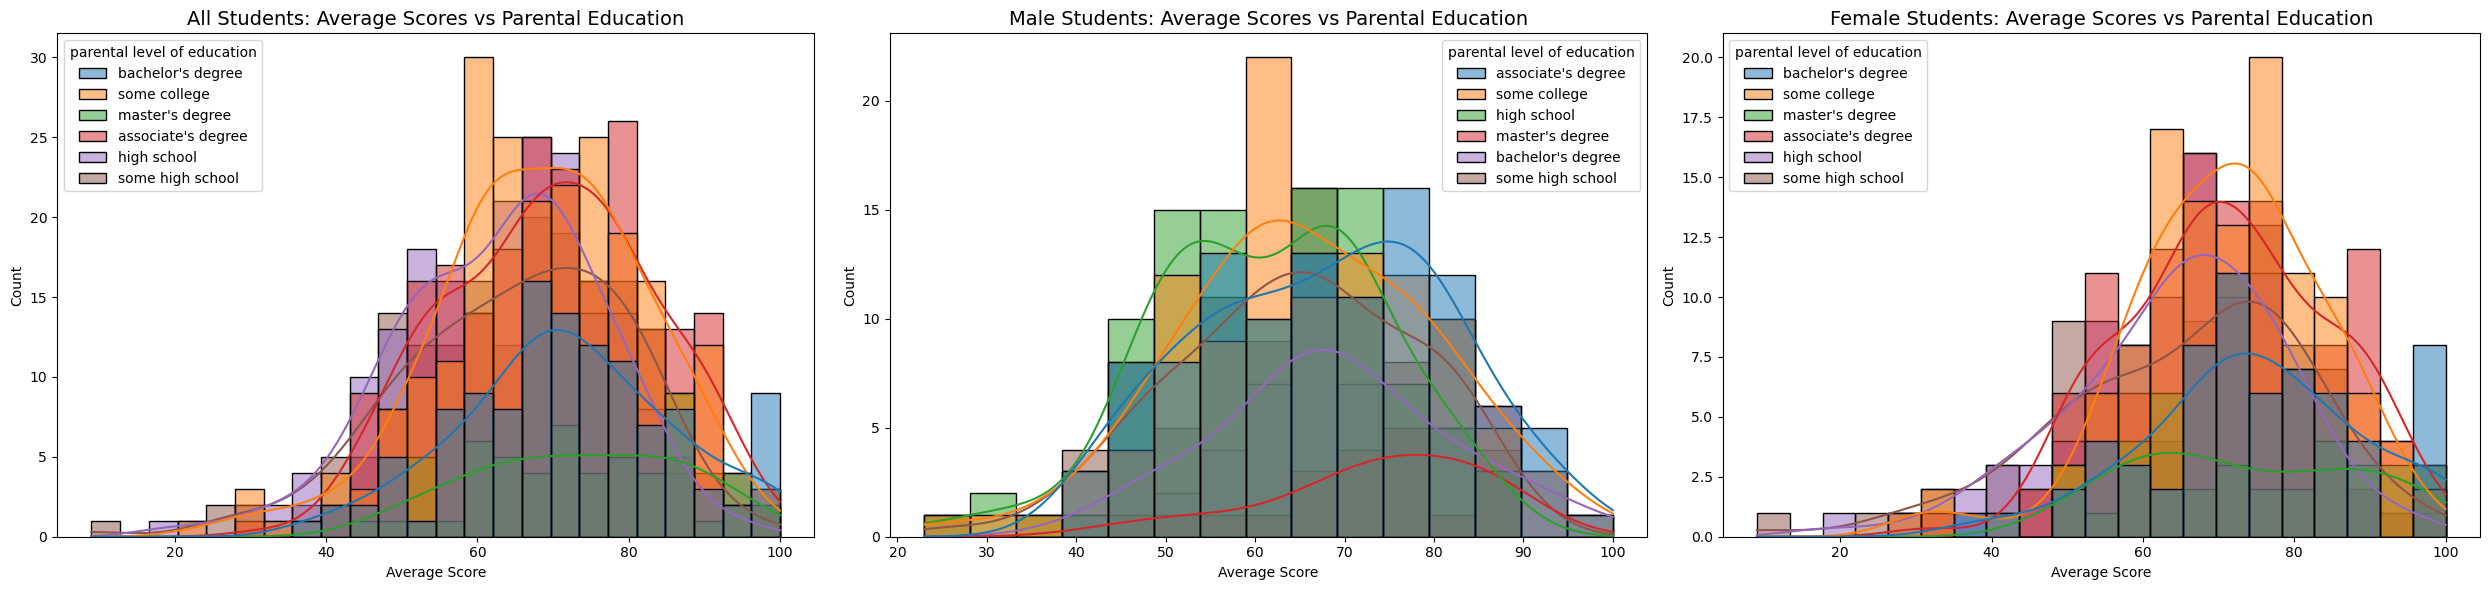

In [36]:
# Correct column name usage
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: All students
sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axes[0])
axes[0].set_title('All Students: Average Scores vs Parental Education', fontsize=14)
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Count')

# Plot 2: Male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental level of education', ax=axes[1])
axes[1].set_title('Male Students: Average Scores vs Parental Education', fontsize=14)
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Count')

# Plot 3: Female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental level of education', ax=axes[2])
axes[2].set_title('Female Students: Average Scores vs Parental Education', fontsize=14)
axes[2].set_xlabel('Average Score')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


🧠 Overall Insights (All Students)
Students whose parents have a bachelor's degree or master's degree generally achieve higher average scores.

Students whose parents completed only high school or some high school tend to have lower average scores, with the distributions shifted toward lower score ranges.

"Some college" and "associate's degree" parents' children fall in between — better than "high school" but slightly lower than bachelor's/master's.

The impact of parental education is positively correlated with student performance: higher parental education → better student average scores.

👨 Insights: Male Students
Male students whose parents have a bachelor's degree or associate's degree perform relatively better.

Those whose parents have only high school or some high school education show lower peaks around 50–60 average scores.

The curve shapes are flatter, meaning parental education affects males but maybe not as strongly compared to females.

👩 Insights: Female Students
Female students show a much stronger correlation between parental education level and performance.

Females with parents holding a bachelor's or master's degree have a high concentration of scores around 75–90.

Students from lower parental education backgrounds (high school, some high school) perform noticeably worse, mostly concentrated in lower average scores.

Female performance seems more sensitive to parental education levels than male performance.

🎯 Key Takeaways
Higher parental education consistently leads to higher average scores among students.

Female students benefit more strongly from parental educational background compared to male students.

Educational support and academic environment at home could be significant factors driving this performance gap.

